# Medical Cost Personal Datasets (Kaggle)

kaggle: https://www.kaggle.com/mirichoi0218/insurance

Features:
    
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Simple EDA

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


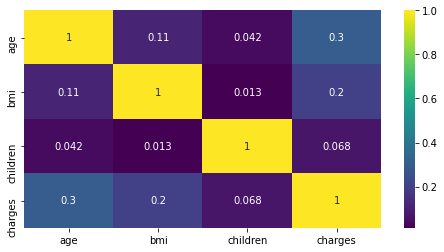

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

#### Feature: Charges

Here we will clean some outliers that might exist.

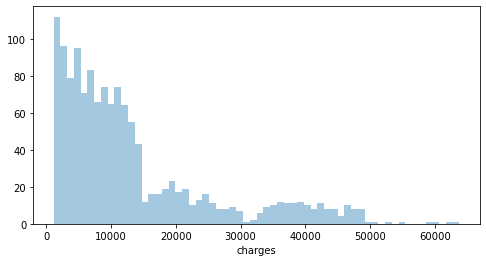

In [7]:
plt.figure(figsize=(8,4))
sns.distplot(df['charges'],kde=False,bins=60)

As we can see prices above 20.000 have less expression in our dataset, so removing that would increase the performance. But we need to pay atention that our model will be prepared to face values between 0 and 20.000, outside that range our model will not bem an expert.

In [8]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [9]:
df = df.sort_values('charges',ascending=False).iloc[280:]

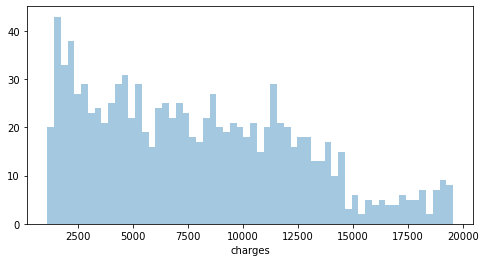

In [10]:
plt.figure(figsize=(8,4))
sns.distplot(df['charges'],kde=False,bins=60)

#### Feature: Sex

This feature needs to be a binary categorical an not a string object.

In [11]:
df['sex'] = np.where(df['sex'] == "male", 1,0)

#### Feature: Smoke

This feature needs to be a binary categorical an not a string object.

In [12]:
df['smoker'] = np.where(df['smoker'] == "yes", 1,0)

#### Feature: region

Since it is not binary we can not simply replace north by 0 ,south by 1 , northwest by 2 ans so one, because the model will intreprete that feature as a numerical one.
We need to use dummie variables to encode properly this information.

In [13]:
df['region'].value_counts()

southeast    274
southwest    268
northwest    263
northeast    253
Name: region, dtype: int64

In [14]:
region_dummies = pd.get_dummies(df['region'],drop_first = True)

In [15]:
df = df.drop('region',axis = 1)

In [16]:
df = pd.concat([df,region_dummies],axis = 1)

In [17]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
750,37,0,26.40,0,1,19539.24300,0,1,0
465,30,0,28.38,1,1,19521.96820,0,1,0
224,42,1,24.64,0,1,19515.54160,0,1,0
1318,35,1,39.71,4,0,19496.71917,0,0,0
235,40,0,22.22,2,1,19444.26580,0,1,0


In [18]:
df.to_numpy()

array([[37.  ,  0.  , 26.4 , ...,  0.  ,  1.  ,  0.  ],
       [30.  ,  0.  , 28.38, ...,  0.  ,  1.  ,  0.  ],
       [42.  ,  1.  , 24.64, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  1.  , 33.33, ...,  0.  ,  1.  ,  0.  ],
       [18.  ,  1.  , 30.14, ...,  0.  ,  1.  ,  0.  ],
       [18.  ,  1.  , 23.21, ...,  0.  ,  1.  ,  0.  ]])

In [19]:
save('data.npy', df.to_numpy())

'df.to_numpy())' was not found in history, as a file, url, nor in the user namespace.


## Linear Regression Model

Now, our data have passed through a simple EDA and is proper to be used in a Machine Learning model. In this case it will be a Linear Regression.

<b>1) First we need to define the features matrix (X) and the label vector (Y)</b> 

In [20]:
X = df.drop('charges',axis = 1) # X is all the columns except the column of the charges
Y = df['charges'] # Y is the label charges

<b>2) Second we need to split our data into 2 sets, the training and the testing</b> 

Note: it is important to split in 3 sets and have a validation one, but in case of low number of data we can apply the "K Fold Cross Validation" to avoid the overfiting.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

<b>3) Third we need to instanciate our Linear Regression Model</b> 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [24]:
model = LinearRegression()

Now we fit the model to our training set.

In [25]:
model.fit(X_train,y_train)

LinearRegression()

### ** Applying K-Fold Cross Validation ** ------------------------------------------------**

Since every model to avoid overfiting need to have a validation control, here we have that option.

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=4)
model_kfold = LinearRegression()
#results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
pred = cross_val_predict(model_kfold, X_test, y_test, cv=kfold)


# ---------------------------------------------------------------------------

And the creation and training our Linear Regression model is finished!!

## Make Predictions With our Model

The predictions is a way to pick up our X_test and obtain the results to compare with the Y_test and evaluate the model

In [33]:
predictions = model.predict(X_test)

In [34]:
pred = model_kfold.predict(X_test)

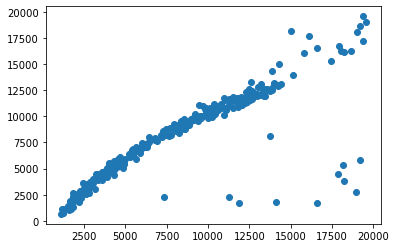

In [28]:
plt.scatter(y_test,predictions)

## Evaluate Our Model

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1067.9922667378578
MSE: 5707541.6961448565
RMSE: 2389.0461896214683


In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1205.131269882027
MSE: 5823360.474015608
RMSE: 2413.163996502436


In [31]:
model.score(X_test,y_test) * 100

73.1156959294416

In [32]:
results_kfold.mean()*100

79.46558640483397